 LETS GROW MORE(OCTOBER-2023) **TASK 2:**
## STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM


IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime , timedelta
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stock_df=pd.read_csv("NSE-TATAGLOBAL.csv")
stock_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


DATA EXPLORATION

In [ ]:
#CHECK SHAPE OF DATA
stock_df.shape

(2035, 8)

It means the data set has 2035 rows and 8 columns.

In [ ]:
#CHECK BASIC INFO OF THE DATA
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
stock_df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
  stock_df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

Here we can see there are no null values.

#EXPLORATORY DATA ANALYSIS
DATA VISUALIZATION

In [ ]:
stock_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

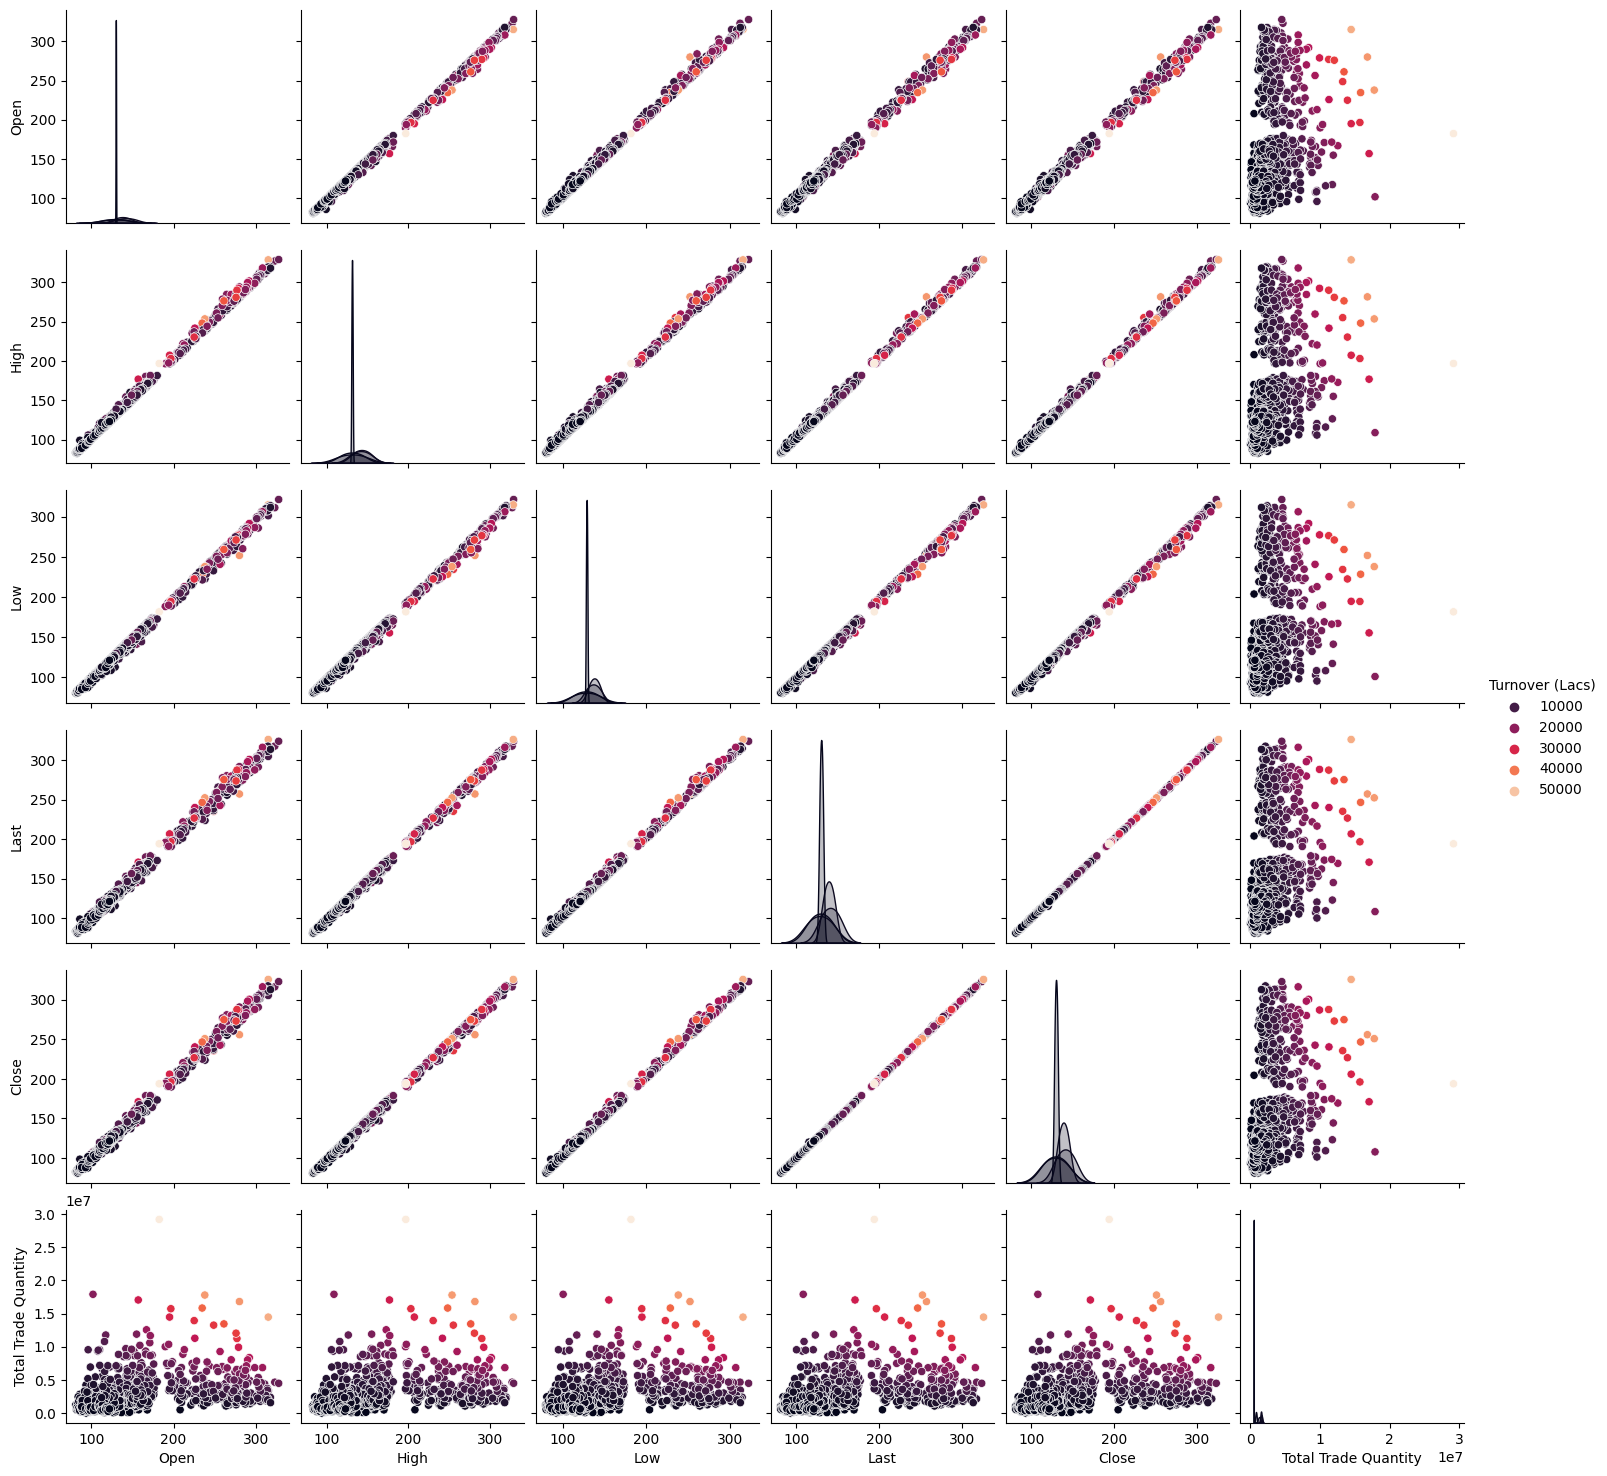

In [ ]:
sns.pairplot(stock_df,hue='Turnover (Lacs)',palette="rocket")
plt.show()

<Axes: >

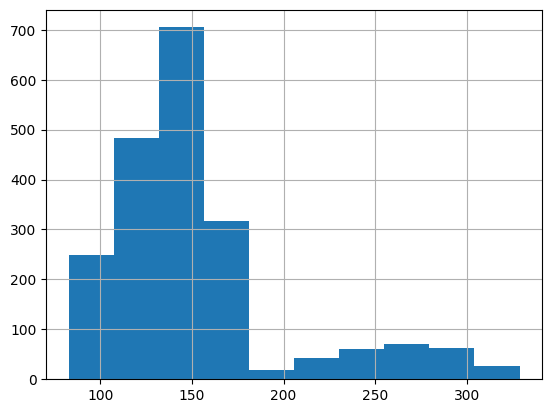

In [ ]:
stock_df['High'].hist()

In [ ]:
df1=stock_df.reset_index()['Close']

In [ ]:
df1.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

In [ ]:
df1.shape

(2035,)

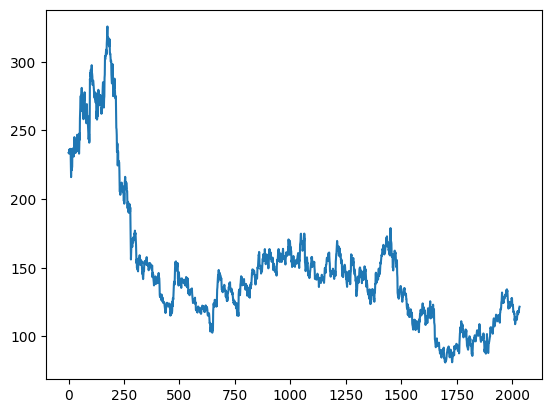

In [ ]:
plt.plot(df1)


In [ ]:
#lstm  are sensitive to scale of the data

In [ ]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

lets plot a High graph using pyplot

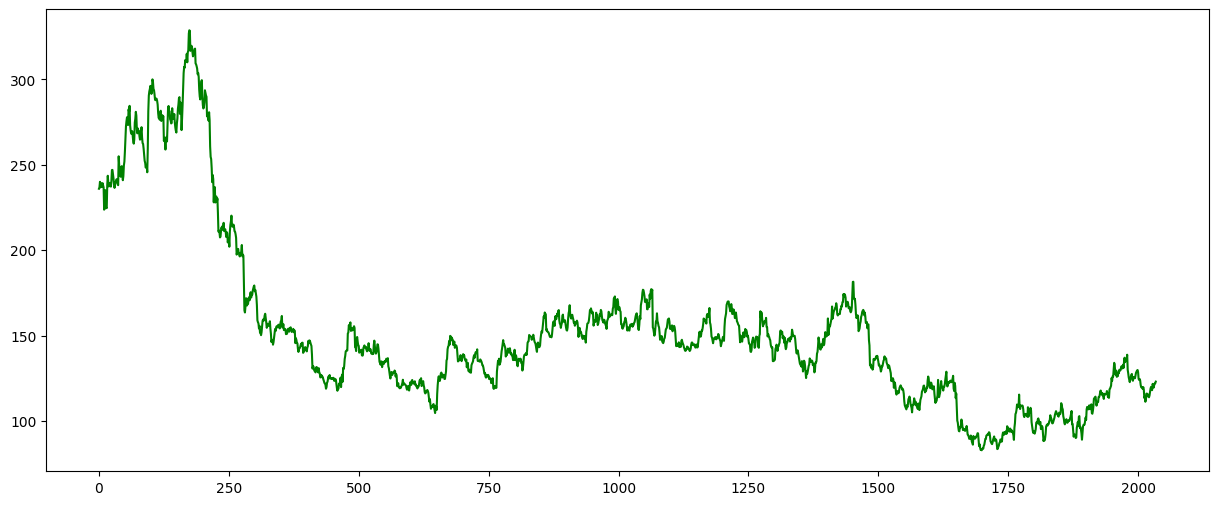

In [ ]:
plt.figure(figsize=(15,6))

df_high=stock_df.reset_index()['High']
plt.plot(df_high, c="g")
plt.show()

In [ ]:
df_high=scaler.fit_transform(np.array(df_high).reshape(-1,1))

In [ ]:
df_high.shape

(2035, 1)

In [ ]:
df_high

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.15917869],
       [0.15938199],
       [0.16344786]])

**TRAIN - TEST SPLIT (USING CROSS VALIDATION OR RANDOM SEED)**

In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1322, 713)

In [ ]:
#PREPROCESSING TO CHECK TIME STEPS


In [ ]:
#CONVERT AN ARRAY OF VALUES INTO A DATASET MATRIX
def create_dataset(dataset,time_step=1):
  dataX , dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX) , np.array(dataY)

In [ ]:
time_step =100
X_train , Y_train = create_dataset(train_data , time_step)
X_test , Y_test = create_dataset(test_data , time_step)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1221, 100)
(1221,)
(612, 100)
(612,)


###**LSTM**
RESHAPE INPUT TO BE [SAMPLES , TIMESTEPS , FEATURES] WHICH IS REQUIRED FOR LSTM


In [ ]:
#3D
#RESHAPE INPUT TO BE [SAMPLES , TIMESTEPS , FEATURES] WHICH IS REQUIRED FOR LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
#CREATE THE STACKED LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(50))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
Total params: 53350 (208.40 KB)
Trainable params: 53350 (208.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train , Y_train , validation_data = (X_test , Y_test), epochs = 20 , batch_size = 64 , verbose = 1)

Epoch 1/20
20/20 [==============================] - 12s 311ms/step - loss: 0.0774 - val_loss: 0.0064
Epoch 2/20
20/20 [==============================] - 4s 184ms/step - loss: 0.0090 - val_loss: 0.0014
Epoch 3/20
20/20 [==============================] - 4s 183ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 4/20
20/20 [==============================] - 4s 227ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 5/20
20/20 [==============================] - 4s 192ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 6/20
20/20 [==============================] - 4s 183ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 7/20
20/20 [==============================] - 4s 198ms/step - loss: 0.0017 - val_loss: 0.0029
Epoch 8/20
20/20 [==============================] - 5s 223ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 9/20
20/20 [==============================] - 4s 183ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 10/20
20/20 [==============================] - 4s 184ms/step - loss: 0.0015 - val_loss: 0.001

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

20/20 [==============================] - 1s 35ms/step


Transform back to orginal form

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
#predict the next 28 days stock prize
len(test_data)

713

In [ ]:
X_test.shape

(612, 100, 1)

In [ ]:
X_input=test_data[613:].reshape(1,-1)
X_input.shape

(1, 100)

PREDICTING THE VALUES OF NEXT 30 DAYS

In [ ]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
day_new.shape

(100,)

In [ ]:
day_pred.shape

(30,)

In [ ]:
len(df_high)

2035

##GRAPH OF LAST 100 DAYS

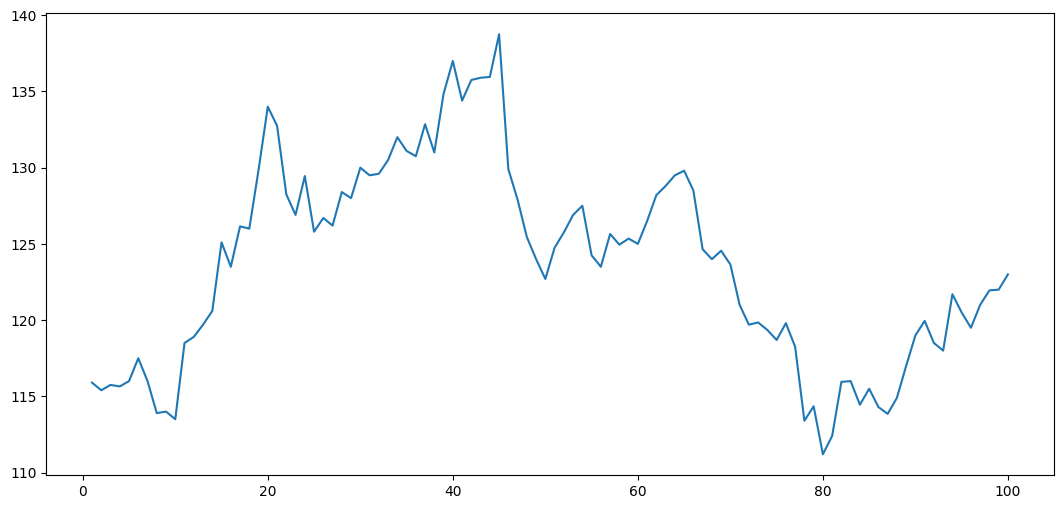

In [ ]:
plt.figure(figsize=(13,6))

plt.plot(day_new , scaler.inverse_transform(df_high[1935:]))

plt.show()

**THANKYOU**